In [1]:
% load_ext autoreload
% autoreload 2


In [2]:
import glob
import os
import numpy as np
import pandas as pd
from collections import defaultdict
import datetime
import src.mex_helper as mex
import folium
from src.utils.map_vis import time_slider_choropleth, geojson_per_row

In [142]:
import matplotlib.pyplot as plt
%matplotlib inline

In [276]:
import src.utils.gis as gis
from src.features import *

# grid average

In [6]:
def grid_avgerage(tw_avg, t2g):
    # there are grids without any call throughout the observation period
    g_avg = t2g.merge(tw_avg, left_on='gtid', right_index=True, how='left')

    for h in range(24):
        h=str(h)
        g_avg[h] = g_avg[h] * g_avg['weight']

    g_avg= g_avg.drop(['gtid','weight'], axis=1).groupby('grid').sum()  # fillna=0 by default

    return g_avg

In [3]:
aver_out = mex.stat_tw_dow_aver_hr_uniq_user('out')
tw_avg_wd = pd.DataFrame(aver_out['wd']).T
tw_avg_wk = pd.DataFrame(aver_out['wk']).T

mex_t2g = mex.tower2grid('cities', 1000)
print('number of towers in cities has no call at all during weekday and weekend', len(set(mex_t2g.gtid) - set(tw_avg_wd.index)), len(set(mex_t2g.gtid) - set(tw_avg_wk.index)))


stats dir: stats/MexTwHrUniqCnt-out/
loading stats by weekday or weekend
loading 0th file stats/MexTwHrUniqCnt-out/2009-10-01-located.csv
loading 50th file stats/MexTwHrUniqCnt-out/2009-11-20-located.csv
loading 100th file stats/MexTwHrUniqCnt-out/2010-01-09-located.csv
loading 150th file stats/MexTwHrUniqCnt-out/2010-03-27-located.csv
loading 200th file stats/MexTwHrUniqCnt-out/2010-05-16-located.csv
computing average of hourly vector by weekday or weekend


In [75]:
# g_avg = pd.DataFrame([average number of calls], index=grid, columns='hour')
g_avg_wd = grid_avgerage(tw_avg_wd, mex_t2g)
g_avg_wk = grid_avgerage(tw_avg_wk, mex_t2g)

In [163]:
%%time
dv_cities, u_cities = urban_dilatation_index(g_avg_wd)

reading existing grids
CPU times: user 1min 4s, sys: 13.6 s, total: 1min 18s
Wall time: 1min 18s


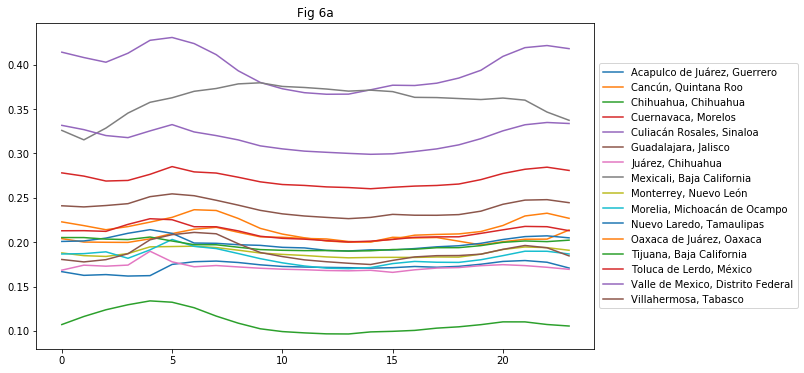

In [275]:
dv_cities.plot(figsize=(10,6), title='Fig 6a')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [284]:
u_cities

Acapulco de Juárez, Guerrero         1.107957
Cancún, Quintana Roo                 1.100460
Chihuahua, Chihuahua                 1.385777
Cuernavaca, Morelos                  1.095850
Culiacán Rosales, Sinaloa            1.174475
Guadalajara, Jalisco                 1.123257
Juárez, Chihuahua                    1.143355
Mexicali, Baja California            1.203853
Monterrey, Nuevo León                1.071854
Morelia, Michoacán de Ocampo         1.193258
Nuevo Laredo, Tamaulipas             1.126227
Oaxaca de Juárez, Oaxaca             1.183169
Tijuana, Baja California             1.083300
Toluca de Lerdo, México              1.130640
Valle de Mexico, Distrito Federal    1.119894
Villahermosa, Tabasco                1.206759
dtype: float64

Text(0.5,1,'Fig 6b')

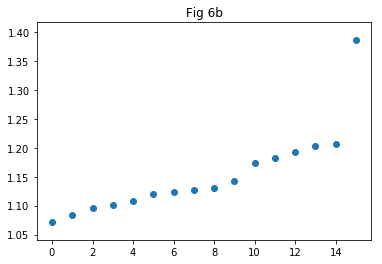

In [274]:
plt.scatter(range(len(u_cities)), u_cities.sort_values().values)
plt.title('Fig 6b')

In [283]:
n_hotspot_cities, hotspot_stats_cities = hotspot_stats(g_avg_wd)

reading existing grids


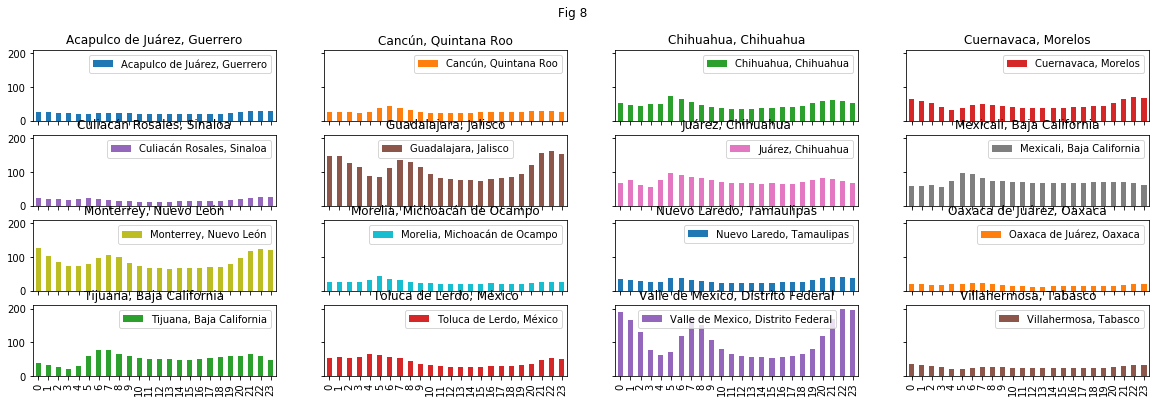

In [273]:
pd.DataFrame(n_hotspot_cities).plot(kind='bar',figsize=(20,6),subplots=True, layout=(4,4),sharey=True, title='Fig 8')
print()

In [245]:
hotspot_stats_cities = pd.DataFrame(hotspot_stats_cities)

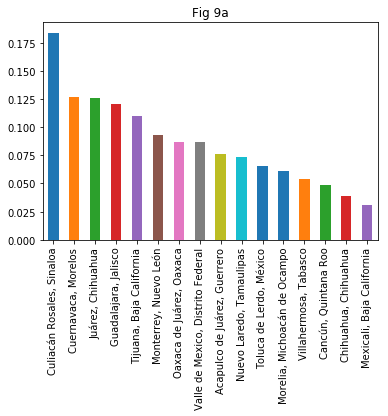

In [272]:
hotspot_stats_cities.compacity_coefficient.sort_values(ascending=False).plot('bar', title='Fig 9a')

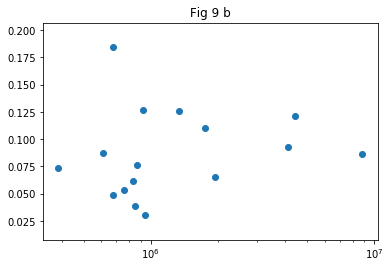

In [271]:
plt.scatter(x=mex_cities.population.sort_index(), y=hotspot_stats_cities.compacity_coefficient.sort_index())
plt.title('Fig 9 b')
plt.xscale("log")

[Text(0,0.5,'number of cities'), Text(0,0.5,'number of cities')]

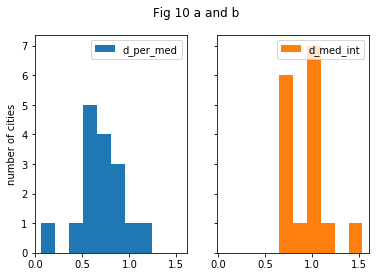

In [269]:
axes = hotspot_stats_cities[['d_per_med','d_med_int']].plot(kind='hist', subplots=True, sharey=True, layout=(1,2), title='Fig 10 a and b')
[ax.set_ylabel('number of cities') for row in axes for ax in row]